In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import svm
%matplotlib inline

In [2]:
x,y = datasets.make_blobs(n_samples=50,n_features=2,centers=2,cluster_std=1.05,random_state=40)
y= np.where(y==0,-1,1)
y

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

In [3]:
x.shape

(50, 2)

In [4]:
class SVM:
    def __init__(self,learning_rate=0.001,lambda_param=0.01,iters=10000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.iters = iters
        self.w = None
        self.b = None
        
    def fit(self,x,y):
        y=np.where(y<= 0,-1,1)
        n_samples,n_features =x.shape
        
        self.w = np.zeros(n_features)
        self.b = 0
        for i in range(self.iters):
            for idx,x_i in enumerate(x):
                condition = y[idx] * (np.dot(x_i,self.w) - self.b)>=1
                if condition:
                    self.w -= self.lr * (2* self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2* self.lambda_param * self.w - np.dot(x_i,y[idx]))
                    self.b -= self.lr * y[idx]
                
    def predict(self,x):
        linear_out = np.dot(x,self.w) - self.b
        return np.sign(linear_out)
                

In [6]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
print(clf.coef_)

[[0.28853302 0.33331864]]


In [11]:
clf_1 = SVM()
clf_1.fit(x, y)

In [12]:
print(clf_1.w, clf_1.b)

[0.45257302 0.25017548] -0.8350000000000006


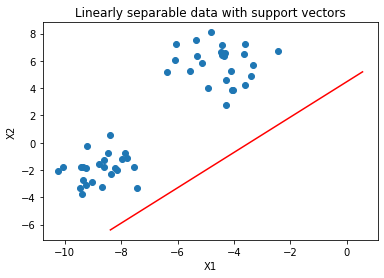

In [14]:
support_vectors = clf.support_vectors_
plt.scatter(x[:, 1], x[:, 0])
plt.plot(support_vectors[0][:], support_vectors[1][:], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

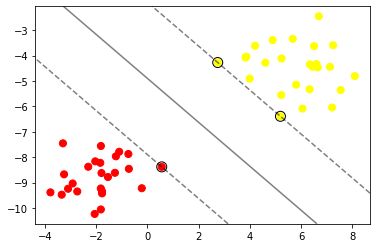

In [16]:
ax = plt.gca()
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()